In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()

rc('font',family=font_name) # 한글 폰트

In [2]:
data=pd.read_csv('Traffic_Accident_2017.csv', encoding='euc-kr')
data.head(3)

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017010101,15,야간,일,1,2,1,0,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,933501,1700129,126.768634,35.294464
1,2017,2017010102,28,야간,일,1,1,0,0,0,...,교차로,교차로부근,승용차,승용차,보행자,보행자,967570,1944453,127.133107,37.498741
2,2017,2017010102,43,야간,일,1,2,0,1,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,916497,1842880,126.566631,36.580069


In [3]:
#요일별 사고 건수
temp = data['요일'].value_counts()
temp

화    608
월    603
금    603
토    596
목    586
수    565
일    504
Name: 요일, dtype: int64

In [4]:
t=temp[['월','화','수','목','금','토','일']]
t

월    603
화    608
수    565
목    586
금    603
토    596
일    504
Name: 요일, dtype: int64

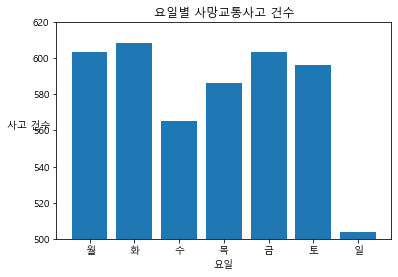

In [5]:
x=t.index
plt.bar(x,t)
plt.ylim(500,620)
plt.xlabel('요일')
plt.ylabel('사고 건수').set_rotation(0)
plt.title('요일별 사망교통사고 건수')
plt.show()

In [6]:
# 차대차 사건중 죽거나 다친 사람이 많은 발생지 시도를 시각화
car = data[data['사고유형_대분류'] == '차대차']

In [7]:
# car에서 발생지시도를 기준으로 합계 구하기
place = car[['사상자수','발생지시도']].groupby('발생지시도').sum()
place

,사상자수
발생지시도,
강원,214
경기,824
경남,248
경북,287
광주,87
대구,115
대전,61
부산,107
서울,197


<function matplotlib.pyplot.show(close=None, block=None)>

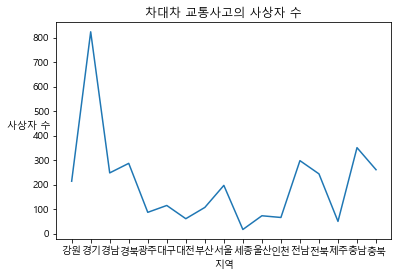

In [8]:
x=place.index
y=place.values
plt.plot(x,y)
plt.xlabel('지역')
plt.ylabel('사상자 수').set_rotation(0)
plt.title('차대차 교통사고의 사상자 수')
plt.show

In [9]:
time = car['발생년월일시']%100
time

0        1
2        2
8       18
9       20
17       9
        ..
4050     9
4055    23
4058    12
4060    18
4063    20
Name: 발생년월일시, Length: 1642, dtype: int64

In [16]:
bins = [-1,2,5,8,11,14,17,20,23] # 구간 설정
labels = ["0~2","3~5","6~8","9~11","12~14","15~17","18~20","21~23"]
result=pd.cut(time,bins,labels=labels)
result

0         0~2
2         0~2
8       18~20
9       18~20
17       9~11
        ...  
4050     9~11
4055    21~23
4058    12~14
4060    18~20
4063    18~20
Name: 발생년월일시, Length: 1642, dtype: category
Categories (8, object): ['0~2' < '3~5' < '6~8' < '9~11' < '12~14' < '15~17' < '18~20' < '21~23']

In [33]:
rs = result.value_counts().sort_index()
rs

0~2      124
3~5      161
6~8      204
9~11     248
12~14    232
15~17    260
18~20    231
21~23    182
Name: 발생년월일시, dtype: int64

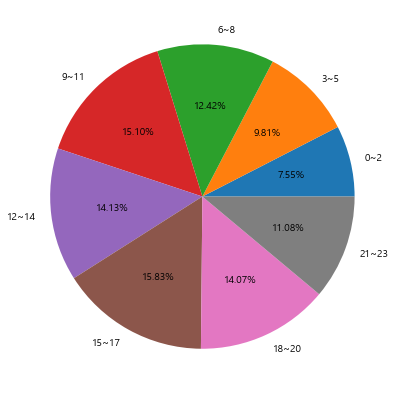

In [59]:
plt.figure(figsize=(7,7)).patch.set_facecolor('w')
plt.pie(rs, labels = labels, autopct="%1.2f%%") # 소수점 2번째 자리까지 표시
plt.show()

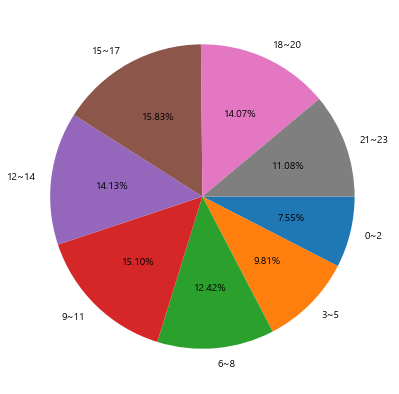

In [61]:
plt.figure(figsize=(7,7)).patch.set_facecolor('w')
plt.pie(rs, labels = labels, autopct="%1.2f%%",counterclock=False) #시계 방향
plt.show()

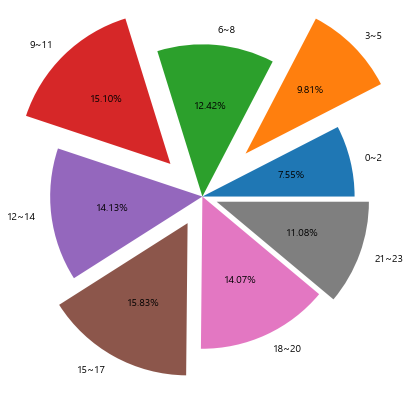

In [75]:
plt.figure(figsize=(7,7)).patch.set_facecolor('w')
explode=[0,0.4,0,0.3,0,0.2,0,0.1]
plt.pie(rs, labels = labels, autopct="%1.2f%%",explode=explode)
plt.show()

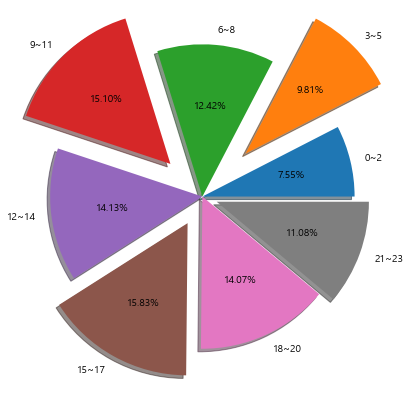

In [77]:
plt.figure(figsize=(7,7)).patch.set_facecolor('w')
explode=[0,0.4,0,0.3,0,0.2,0,0.1]
plt.pie(rs, labels = labels, autopct="%1.2f%%",explode=explode,shadow=True)
plt.show()

In [78]:
years=[1950,1960,1970,1980,1990,2000,2010]
gdp=[67.0,80.0,257.0,1686.0,6505,11865.3,22105.3]


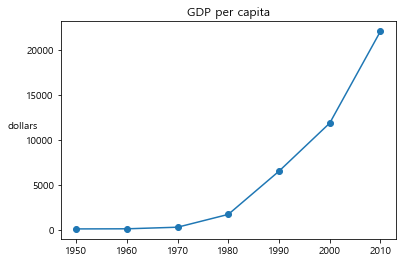

In [89]:
plt.plot(years,gdp,marker='o')
plt.title("GDP per capita")
plt.ylabel('dollars').set_rotation(0)
plt.savefig('gdp_percapita.png',dpi=600) # 저장 
plt.show()

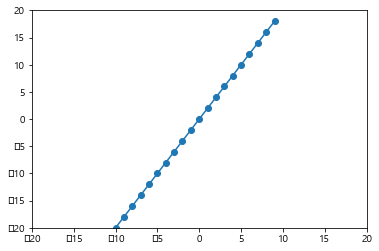

In [102]:
x = range(-10,10)
y= range(-20,20,2)
plt.plot(x,y,marker='o')
plt.axis([-20,20,-20,20])
plt.show()

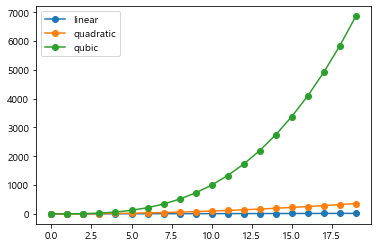

In [109]:
x=[x for x in range(20)]
y=[x**2 for x in range(20)]
z=[x**3 for x in range(20)]

plt.plot(x,x,label='linear',marker='o')
plt.plot(x,y,label='quadratic',marker='o')
plt.plot(x,z,label='qubic',marker='o')
plt.legend()
plt.show()

In [148]:
sr = pd.Series([90,90,55,60,76,80,76,88,30,25])
sr.index = ['짱구','유리','훈이','맹구','흰둥이','이슬','수지','철수1','철수2','철수3']
sr.max()

90

In [118]:
sr.nlargest(1,keep='all').index # 데이터가 큰 모든 데이터 출력

Index(['짱구', '유리'], dtype='object')

In [125]:
sr[(sr<=80)&(sr>=50)]
sr.mean()

67.0

<AxesSubplot:>

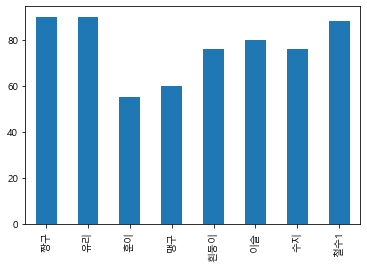

In [129]:
sr50=sr[sr>=50]
sr50.plot(kind='bar')

In [141]:
# 키보드로 학생들의 이름을 입력 받고, 그 학생의 영어 점수를 출력받아 봅시다.
name = input('학생의 이름을 입력하세요: ')
sr[name]

90

In [201]:
# 영어 점수 등급을 매겨봅시다
# F 0~59 D 60 ~ 69 C 70 ~ 79 B 80 ~ 89 A 90 ~ 100
bins = [-1,59,69,79,89,100]
label=['F','D','C','B','A']
sr_cut=pd.cut(sr,bins,labels=label)

print('-'*20)
print('이름','영어','등급',sep='\t')
a = pd.concat([sr,sr_cut],axis=1)
a.columns = ['영어','등급']
a 

--------------------
이름	영어	등급


,영어,등급
짱구,90,A
유리,90,A
훈이,55,F
맹구,60,D
흰둥이,76,C
이슬,80,B
수지,76,C
철수1,88,B
철수2,30,F
철수3,25,F


In [174]:
sr.quantile([0.3,0.6,0.8])

0.3    58.5
0.6    77.6
0.8    88.4
dtype: float64

In [186]:
fruit = pd.Series([10,20,30,50], index=['딸기','귤','수박','사과'],name ='과일')
fruit

Index(['딸기', '귤', '수박', '사과'], dtype='object')

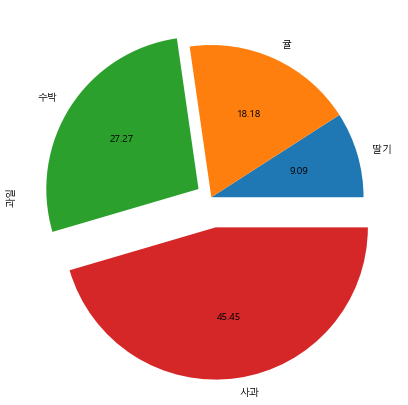

In [202]:
plt.figure(figsize=(7,7)).patch.set_facecolor('w')
fruit.plot(kind='pie',autopct='%.2f',explode=[0,0,0.1,0.2])
plt.show()
